# Q2

In [1]:
import numpy as np
import pandas as pd
from numpy import log2 as log
from IPython.display import display
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Q_Learning:

In [64]:
def initialization(R2):
    act={'U':(-1,0),'D':(1,0),'R':(0,1),'L':(0,-1)}
    actindex = {'U':0,'D':1,'R':2,'L':3}
    acts = ['U','D','R','L']
    Rindex = [[1,0,2,2,2,2,2,2,2,2,2,2,2,2,0],    
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [5,4,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,3],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [0,0,2,2,2,2,2,2,2,2,2,2,2,2,0],
              [0,0,0,0,0,5,4,4,0,0,0,0,0,0,0],
              [0,0,0,0,0,5,4,5,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

    Rvalue = {0:-0.01, 2:-20, 3:100, 4:R2,5:-100, 1:-0.01} 
    rewards = [[Rvalue[Rindex[i][j]] for j in range(15)] for i in range(15)]
    Q_table = np.zeros([15,15,4])
    for i in range(4):Q_table[:,:,i] = np.array(rewards)*0.3
    return act, Q_table, rewards, actindex

def checkindex(r,i,c,j,pre_state):
    
    row = r+i
    col = c+j
    if((0<=row and row<=14) and (0<=col and col<=14) and \
       (row !=0 or col!=0)and (pre_state[-1][0] !=row or pre_state[-1][1] != col)):
        if(row!=2 or col!=1):
            return row,col,True
        else:
            return r,c,False
    else:
        return r,c,False
    

def softmax(Q_table,i,j,act,actindex,pre_state):
    
    softmax = []
    validact = []
    for key in act.keys():
        i_,j_ ,boolean= checkindex(i,act[key][0],j,act[key][1],pre_state)
        if boolean == True:
            z = actindex[key]
            Q = Q_table[i_, j_ , z]
            softmax.append(math.exp(Q))
            validact.append(key)
            
    softmax = np.array(softmax) / sum(softmax)
    cumulative_probability = 0.0
    choice = random.uniform(0,1)
    for a,pr in enumerate(softmax):
        cumulative_probability += pr
        if cumulative_probability > choice:
            A = validact[a]
            nexti, nextj ,boolean= checkindex(i,act[A][0],j,act[A][1],pre_state)
            return A, nexti, nextj       

    
def epsilon_greedy(Q_table, i, j, act, actindex,pre_state):
     
    validact = {}
    for key in act.keys():
        i_,j_ ,boolean = checkindex(i,act[key][0],j,act[key][1],pre_state)
        if(boolean == True):
            z = actindex[key]
            Q = Q_table[i_, j_ , z]
            validact[key] = Q  
    
    epsilon = 0.05
    if np.random.random()  < epsilon:
        Vact = list(validact.keys())
        #Vact.remove(max(validact,key=validact.get))
        #A = random.sample(Vact,1)[0]
        A = np.random.choice(Vact)
        nexti, nextj, boolean = checkindex(i,act[A][0],j,act[A][1],pre_state)

    else:
        A = max(validact,key=validact.get)
        nexti, nextj, boolean = checkindex(i,act[A][0],j,act[A][1],pre_state)
    
    return A, nexti, nextj

def Qlearning(episode,R2,policy):
    data = []
    routes = []
    act, Q_table, rewards, actindex = initialization(R2)
    gamma = 0.9
    cnt=1
    lr = 0.43
    for epoch in range(episode):
        
        i,j = 0,0
        pre_state = [[0,0],[0,0]]
        state = np.zeros([15,15])
        state_count = np.zeros([15,15])
        route = [['*'for j in range(15)] for i in range(15)]
        count = 0
        while((i!=8 or j!=14) and count<=1000):
            if policy == 'softmax':
                A, nexti, nextj = softmax(Q_table, i, j, act, actindex,pre_state)
            if policy == 'epsilon_greedy':
                A, nexti, nextj = epsilon_greedy(Q_table, i, j, act, actindex,pre_state)
                
            route[i][j] = A
            #if epoch>1 :print(A,i,j)
            state_count[i,j] = state_count[i,j] + 1
            R = rewards[nexti][nextj]
            state[nexti,nextj] = R
            z = actindex[A]
            nextQ =  max(Q_table[nexti,nexti,:])
            Q_table[i,j,z] = Q_table[i,j,z] + lr*(R+gamma*nextQ-Q_table[i,j,z])
            pre_state.append([i,j])
            i,j = nexti, nextj
            count +=1
            
        cnt += 1
        lr = lr/cnt    
        sumOfreward = state.sum()
        #print(epoch,sumOfreward)
        routes.append(route)
        data.append([epoch,sumOfreward])
    return data,routes
    
def plotting(data,routes):
    
    act={'U':(-1,0),'D':(1,0),'R':(0,1),'L':(0,-1)}
    col ={'U':4,'D':3,'R':2,'L':1}
    data = np.array(data)
    index = data[:,1].argmax()
    display('Best reward:', data[index,1] )
    route = routes[index]
    maps = np.zeros([15,15])
    label = [['' for i in range(15)] for j in range(15)]
    route[8][14] = 'E'
    i,j=0,0
    while(route[i][j] != 'E'):
        newi, newj = i+act[route[i][j]][0],j+act[route[i][j]][1]
        maps[i,j] = col[route[i][j]]
        label[i][j] = route[i][j]
        i,j = newi, newj
    
    maps[8][14] = 1
    label[8][14] = 'End'
    #/////////////////////////////////////////////////////////////// 
    #Route
    index= np.arange(0,15,1)
    cols = np.arange(0,15,1)
    df = pd.DataFrame(maps, index=index, columns=cols)
    fig = plt.figure("route", figsize=(10, 10))
    ax1 = sns.heatmap(df, cbar=0, linewidths=2,vmax=4, vmin=0, square=True, cmap='Blues',annot=label,fmt='')
    plt.show()
    
    #//////////////////////////////////////////////////////////////
    #Reward
    fig = plt.figure("Total Rewards per epoch", figsize=(20, 8))
    plt.title("Total Rewards per epoch")
    plt.plot(data[:,0],data[:,1])
    plt.xlabel("Number of episodes")
    plt.ylabel("Rewards")
    

## Epsilon_greedy with R2= 30

'Best reward:'

219.57999999999998

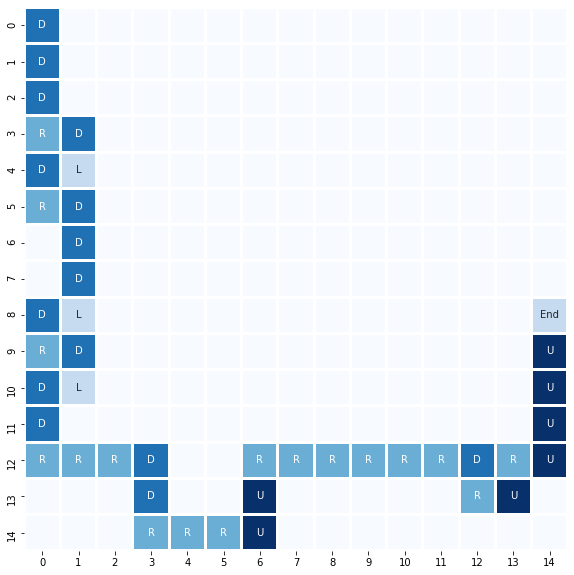

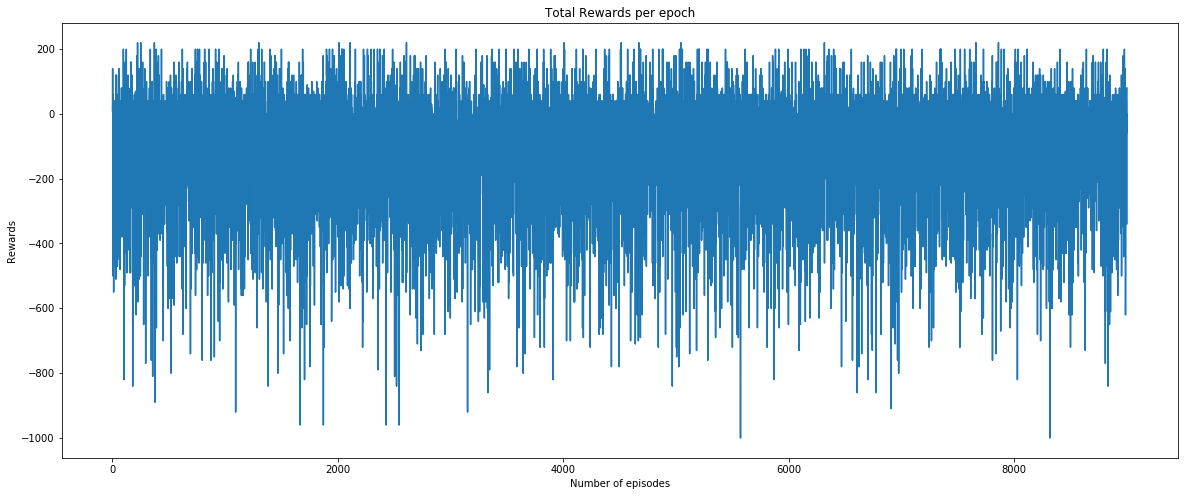

In [66]:
data ,routes= Qlearning(9000,30,'epsilon_greedy')
plotting(data,routes)

## Epsilon_greedy with R2= 0

'Best reward:'

99.78999999999999

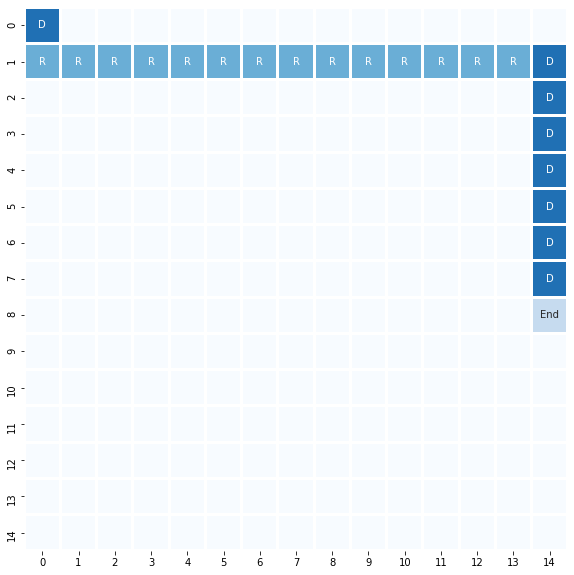

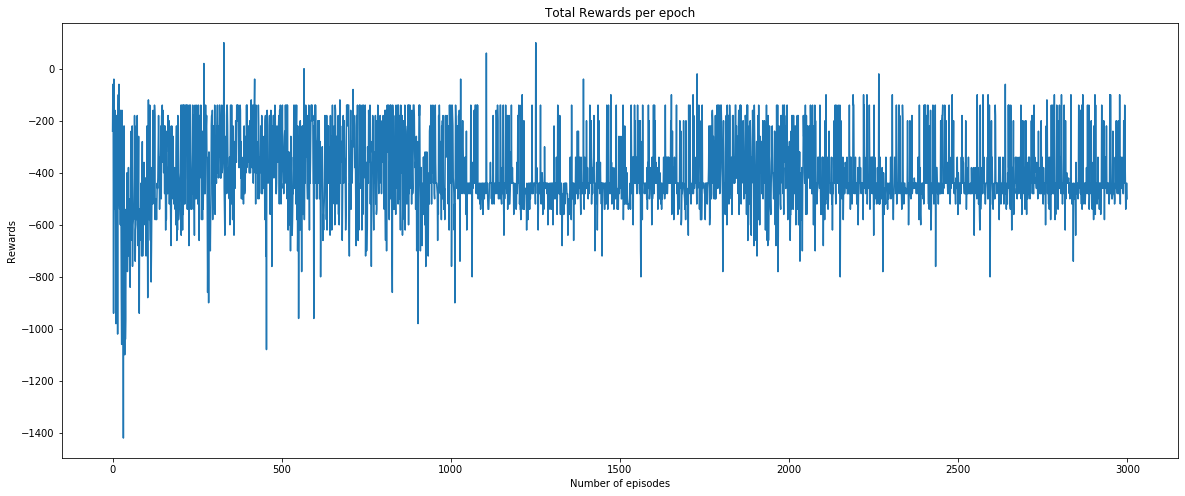

In [34]:
data ,routes= Qlearning(3000,0,'epsilon_greedy')
plotting(data,routes)

## Softmax with R2=0

'Best reward:'

99.78999999999999

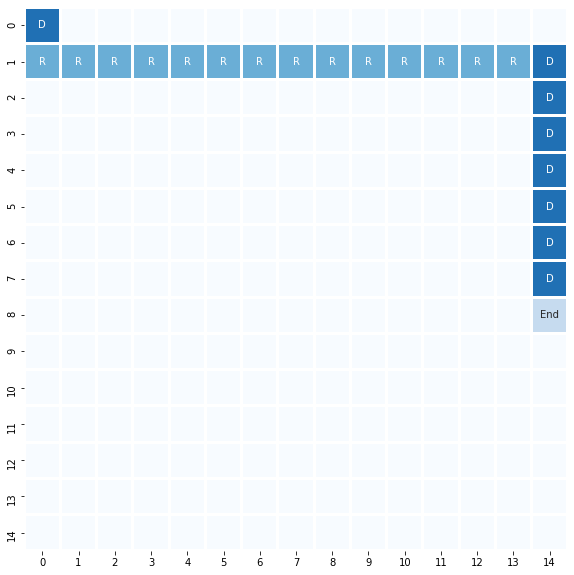

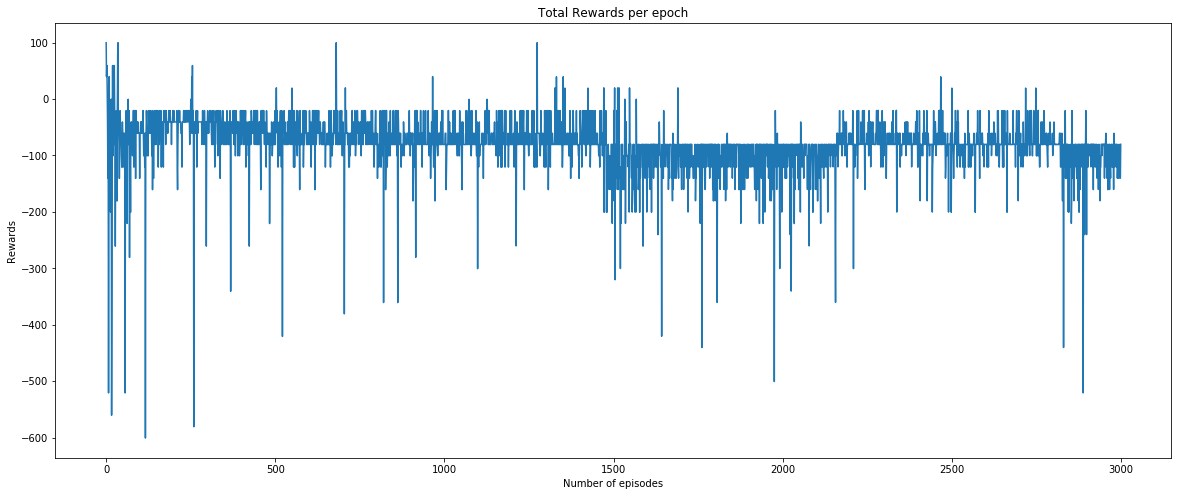

In [30]:
data ,routes= Qlearning(3000,0,'softmax')
plotting(data,routes)

## Softmax with R2=30

'Best reward:'

199.49999999999997

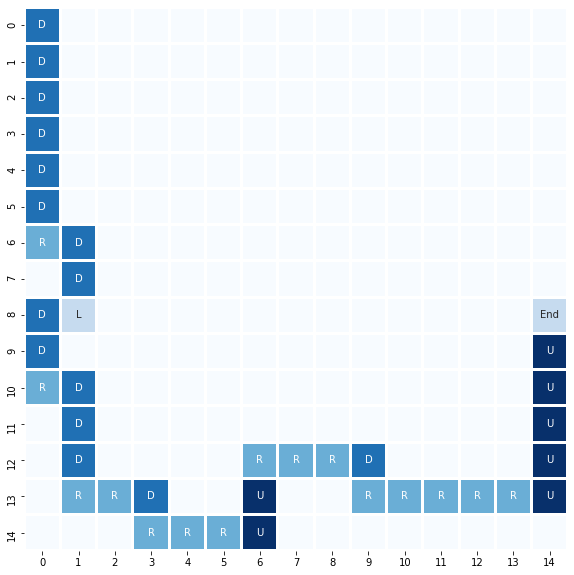

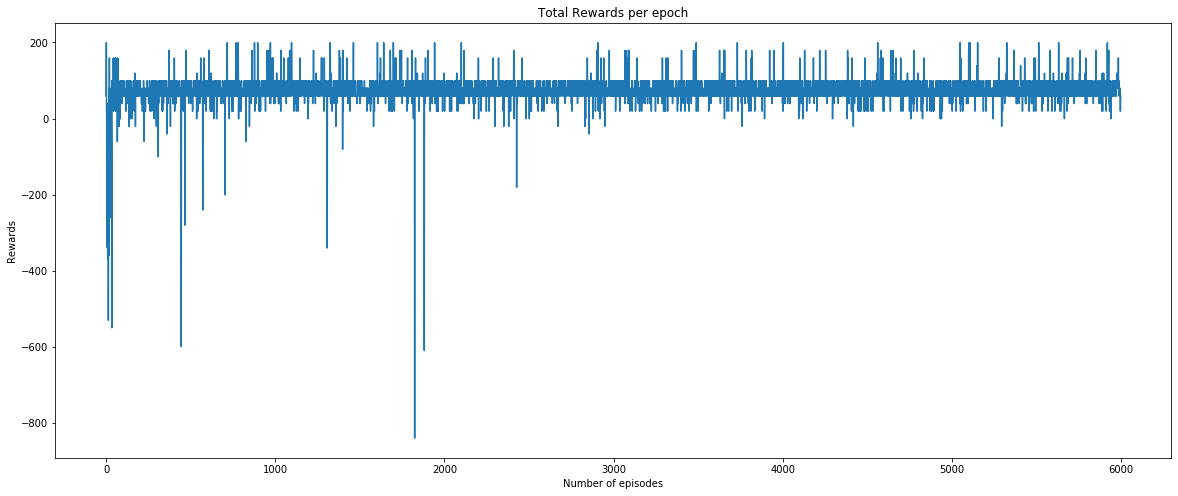

In [39]:
data ,routes= Qlearning(6000,30,'softmax')
plotting(data,routes)

### The advantages and differences of softmax policy compared to epsilon_greedy:
#### epsilon_greedy:
   * the simplest (but very effective) way to try to balance exploration and exploitation(it can better find global minimum)
   
#### softmax:
* Softmax action selection methods grade action probabilities by estimated values. 
* as we can see it can better find an optimal way, becuase it choose action a on play t with Boltzmann distribution.
    

###### sharare zolghadr(610395109)